In [ ]:
# !pip install matplotlib
# !pip install librosa
# !pip install panda
# !pip install numpy


In [3]:
# Librosa is a Python library widely used for audio analysis and feature extraction. It offers a comprehensive set of tools for loading audio files,
# computing spectrograms, extracting audio features, and performing transformations. Librosa simplifies tasks like music genre classification,
# speech recognition, and audio segmentation by providing functions for mel spectrograms, chroma features, and more. It seamlessly integrates
# with popular Python libraries, making it a popular choice for researchers and data scientists working with audio data in fields such as
# music information retrieval and sound classification. Librosa's user-friendly interface and extensive functionality make it a valuable
# resource in audio analysis and processing workflows.

In [8]:
# The line `from google.colab import files` is used to import the `files` module in Google Colab, which enables file uploading
# and downloading functionality within the environment. `uploaded = files.upload()` is a code snippet that allows users to upload
# files from their local system to the Colab environment. The uploaded files are stored in a dictionary-like object called `uploaded`,
# where the keys represent the filenames and the values contain the file data. This feature facilitates seamless transfer and access of
# files between a local system and the Google Colab notebook for various purposes such as data analysis or machine learning tasks.

from google.colab import files
uploaded = files.upload()

Saving Label Track.txt to Label Track.txt


In [9]:
!ls /content/

'basketball-high-school-gym2 .wav'  'Label Track.txt'   sample_data


In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd



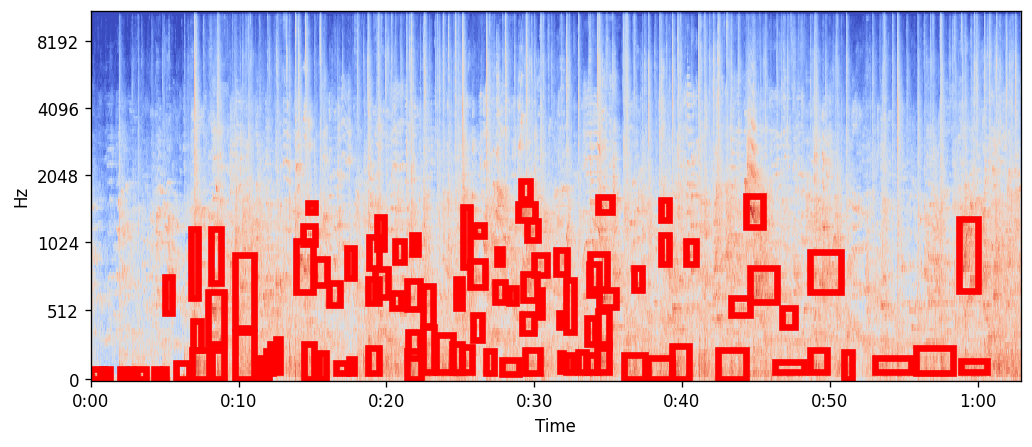

In [11]:
# Load a text file and generate a dataframe containing the labels.

def txt2df(file):

    with open(file) as f:
        labels = f.read()
        labels = [l.split('\t') for l in labels.split('\n')][:-1]
        labels = [l for o in labels for l in o]
        labels = [l for l in labels]
        labels = [l for l in labels if l != '\\']
        labels = np.array(labels).reshape(-1, 5)
        df = pd.DataFrame({'start': labels[:,0].astype(float), 'end': labels[:,1].astype(float),
                           'fmin': labels[:,3].astype(float), 'fmax': labels[:,4].astype(float),
                           'name': labels[:,2].astype(str)})
    return df

def rectangle(df_row, frequency):
    start, end, fmin, fmax = [df_row[o] for o in ['start', 'end','fmin', 'fmax']]
    if fmin == -1: fmin = 0
    if fmax == -1: fmax = frequency.max()
    xy = (start, fmin)
    width = end - start
    height = fmax - fmin
    return xy, width, height

# Spectrogram

data, sr = librosa.load("/content/basketball-high-school-gym2 .wav")

spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
spectrogram = librosa.power_to_db(spectrogram)

# Labels
labels = txt2df("/content/Label Track.txt")

# Plot
fig, ax = plt.subplots(figsize=(10,4), dpi=120)
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel', ax=ax);
for i in range(len(labels)):
    ax.add_patch(Rectangle(*rectangle(labels.iloc[i], ax.axis()[2:]), fc ='none', ec ='r', lw = 4))